In [1]:
# Importing pandas
import pandas as pd

# Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

# Reading datasets/coinmarketcap_06122017.csv into pandas
dec6 = pd.read_csv("/kaggle/input/exploring-the-bitcoin-cryptocurrency-market/coinmarketcap_06122017.csv")

# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6[['id','market_cap_usd']]

# Counting the number of values
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

In [2]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')

# Counting the number of values again
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

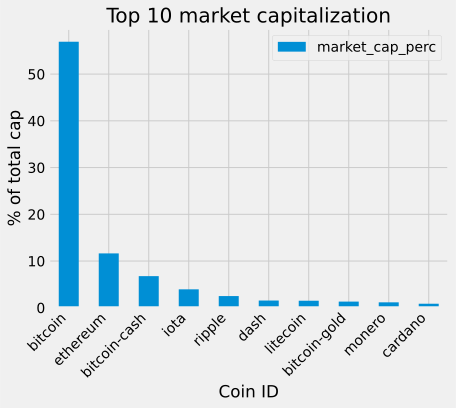

In [3]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = cap.head(10).set_index('id')

# Calculating market_cap_perc
total_market_cap= cap.market_cap_usd.sum()
cap10 = cap10.assign(market_cap_perc=lambda x: (x['market_cap_usd']/total_market_cap)*100)

# Plotting the barplot with the title defined above 
ax = cap10.plot(kind='bar', y='market_cap_perc')
ax.set_title("Top 10 market capitalization")
ax.set_xlabel("Coin ID")

# Annotating the y axis with the label defined above
ax.set_ylabel("% of total cap")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Text(0.5, 0, '')

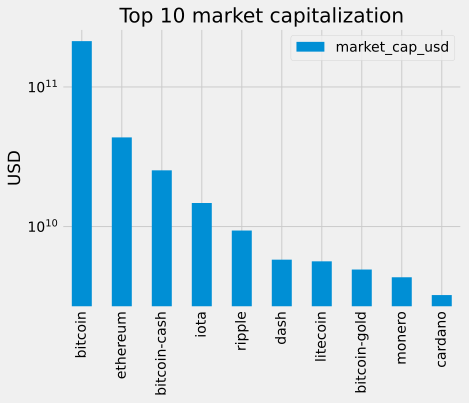

In [4]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  
ax = ax = cap10.plot.bar( y='market_cap_usd',logy=True)
ax.set_title("Top 10 market capitalization")
# Annotating the y axis with 'USD'
ax.set_ylabel("USD")

# Final touch! Removing the xlabel as it is not very informative
ax.set_xlabel('')

In [5]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[['id','percent_change_24h','percent_change_7d']]

# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id')
volatility = volatility.dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values('percent_change_24h')

# Checking the first few rows
volatility.head()

percent_change_24h  percent_change_7d
id                                                  
flappycoin                 -95.85             -96.61
credence-coin              -94.22             -95.31
coupecoin                  -93.93             -61.24
tyrocoin                   -79.02             -87.43
petrodollar                -76.55             542.96